Features of Pizza dataset:
    Extra_Cheeze  Extra_Mushroom   Size_Inch  Extra_Spicy
0              1               1          12            0
1              0               1          15            1
2              0               0           9            0
3              1               0          12            1
4              1               0          12            1
5              0               1          15            1
6              1               0           9            0
7              1               0           9            1
8              0               1          15            0
9              0               1          15            0
10             1               1           8            0
11             0               0          12            1
12             1               1           8            0
13             1               1          12            1
14             1               0          12            0
15             1               1          12 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 - 1s - 487ms/step - loss: 728.2679 - mae: 728.2679
Epoch 2/100
3/3 - 0s - 9ms/step - loss: 726.7905 - mae: 726.7905
Epoch 3/100
3/3 - 0s - 19ms/step - loss: 725.5314 - mae: 725.5314
Epoch 4/100
3/3 - 0s - 19ms/step - loss: 724.3077 - mae: 724.3077
Epoch 5/100
3/3 - 0s - 10ms/step - loss: 723.1461 - mae: 723.1461
Epoch 6/100
3/3 - 0s - 10ms/step - loss: 721.8668 - mae: 721.8668
Epoch 7/100
3/3 - 0s - 9ms/step - loss: 720.3797 - mae: 720.3797
Epoch 8/100
3/3 - 0s - 9ms/step - loss: 718.7360 - mae: 718.7360
Epoch 9/100
3/3 - 0s - 9ms/step - loss: 716.8813 - mae: 716.8813
Epoch 10/100
3/3 - 0s - 9ms/step - loss: 714.7427 - mae: 714.7427
Epoch 11/100
3/3 - 0s - 10ms/step - loss: 712.2706 - mae: 712.2706
Epoch 12/100
3/3 - 0s - 12ms/step - loss: 709.4874 - mae: 709.4874
Epoch 13/100
3/3 - 0s - 20ms/step - loss: 706.2318 - mae: 706.2318
Epoch 14/100
3/3 - 0s - 10ms/step - loss: 702.3839 - mae: 702.3839
Epoch 15/100
3/3 - 0s - 9ms/step - loss: 698.1581 - mae: 698.1581
Epoch 16/

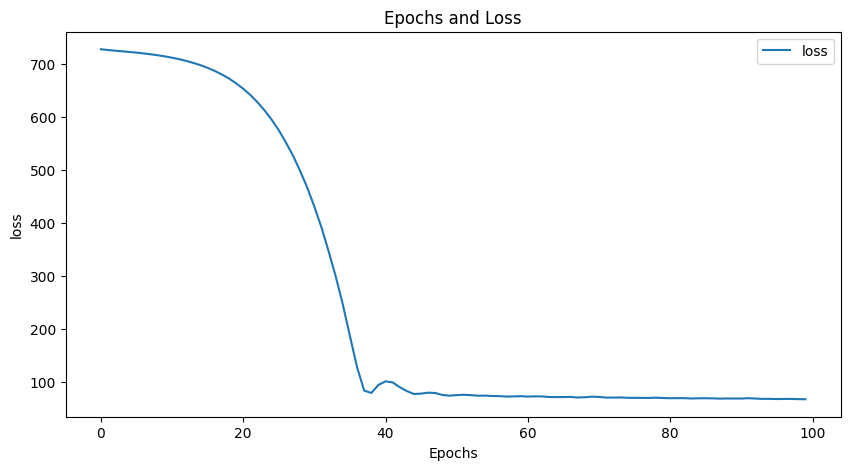

Prediction


KeyboardInterrupt: Interrupted by user

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split as tts
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam

import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the Pizza dataset
df = pd.read_csv("pizza_price-1.csv")
x = df.drop(columns=["Restaurant","Price"])
y = df[["Price"]]


# Display the features and labels
print("Features of Pizza dataset:")
print(x)

print("\nLabels of Pizza dataset:")
print(y)


# Build the neural network model
model = Sequential()

# Adding layers to the model
model.add(Dense(128, input_dim=4, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

# Compile the model
model.compile(optimizer="Adam", loss='mae', metrics=['mae'])

# Display the model summary
print("\nModel Summary:")
model.summary()

#checkpoint = ModelCheckpoint("pizza_model.keras", monitor='accuracy', verbose=1, save_best_only=True)

history = model.fit(x, y, epochs=100, batch_size=8, verbose=2)

hdf = pd.DataFrame(history.history)
print("Data Frame")
print(hdf)

# Save the trained model
model.save("pizza_model.keras")


# Plotting epochs and loss
plt.figure(figsize=(10, 5))
plt.plot(hdf['loss'], label='loss')

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Epochs and Loss')
plt.legend()
plt.show()


# Prediction
print("Prediction")
n1=int(input("Extra_Cheeze:"))
n2=int(input("Extra_Mushroom:"))
n3=int(input("Size_Inch:"))
n4=int(input("Extra_Spicy:"))


pred = model.predict(np.array([[n1, n2, n3, n4]]))
print("Predicted Price of the Pizza is:")
print(pred)
